# K-Nearest Neighbors (KNN)

## Dataset

Have a quick look at the dataset.

In [38]:
%cat ../00_data/Social_Network_Ads.csv | head

Age,EstimatedSalary,Purchased
19,19000,0
35,20000,0
26,43000,0
27,57000,0
19,76000,0
27,58000,0
27,84000,0
32,150000,1
25,33000,0


In [39]:
%cat ../00_data/Social_Network_Ads.csv | tail

48,33000,1
47,23000,1
45,45000,1
60,42000,1
39,59000,0
46,41000,1
51,23000,1
50,20000,1
36,33000,0
49,36000,1

## Goal

Create a classification model to predict which customer would buy a new SUV.

## Load the libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [41]:
df = pd.read_csv('../00_data/Social_Network_ads.csv', decimal='.', sep=',')

df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [42]:
df.shape

(400, 3)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [44]:
np.sum(df.isna(), axis=0)

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## Target Variable and Features

+ Target Variable: `Purchased`
+ Features:
    + `Age`
    + `EstimatedSalary`


In [45]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [46]:
X[:10, :]

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000]])

In [47]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

## Split the training and testing set

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Features scaling

> **NOTE!** It is crucial to scale the data for KNN because the algorithm relies on distance metrics (e.g., Euclidean, Manhattan) to determine the neighbors.

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
X_train[:5, :]

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358]])

In [51]:
y_train[:5]

array([0, 1, 0, 1, 1])

In [52]:
X_test[:5, :]

array([[-0.80480212,  0.50496393],
       [-0.01254409, -0.5677824 ],
       [-0.30964085,  0.1570462 ],
       [-0.80480212,  0.27301877],
       [-0.30964085, -0.5677824 ]])

In [53]:
y_test[:5]

array([0, 0, 0, 0, 0])

## Fit and train the model

In [54]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Predicting a new result

In [55]:
# the classification to predict the class of the instance
classifier.predict(scaler.transform([[30, 87000]]))

array([0])

## Predicting the Testing set results

In [56]:
prob_pred = y_pred = classifier.predict_proba(X_test)
prob_pred

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.4, 0.6],
       [0.8, 0.2],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. ,

In [57]:
y_pred = classifier.predict(X_test) # the testing set has already been scaled
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [58]:
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


## Evaluate the performance of the model

### Confusion matrix

The confusion matrix shows how many mistakes and correct predictions are model made.

In [60]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[64  4]
 [ 3 29]]


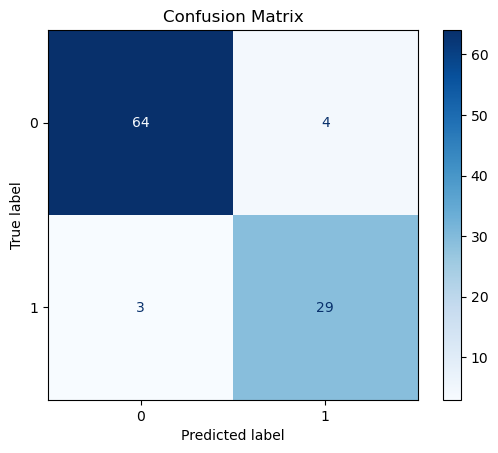

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=classifier.classes_)
disp.plot(cmap=plt.cm.Blues,
         colorbar=True)
plt.title("Confusion Matrix")
plt.show()

**Interpretation:**

$$
\begin{bmatrix}
True Negative & False Positive\\
False Negative & True Positive
\end{bmatrix}
$$

### Accuracy score

The accuracy score measures the percentage of correct predictions made by a classification model over the total number of predictions.

In [66]:
from sklearn.metrics import accuracy_score

ac = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {ac*100}%')

Accuracy on test set: 93.0%


In [68]:
from sklearn.metrics import classification_report

# Full report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



## Viz the Training set results

/var/folders/qg/tg87rgq56j3f4ynsm4r5grw80000gn/T/ipykernel_64506/4034703557.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


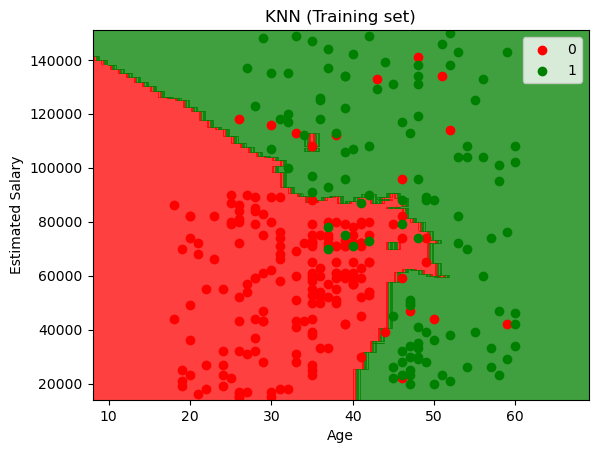

In [65]:
from matplotlib.colors import ListedColormap
X_set, y_set = scaler.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Viz the Test set results

/var/folders/qg/tg87rgq56j3f4ynsm4r5grw80000gn/T/ipykernel_64506/1726557614.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


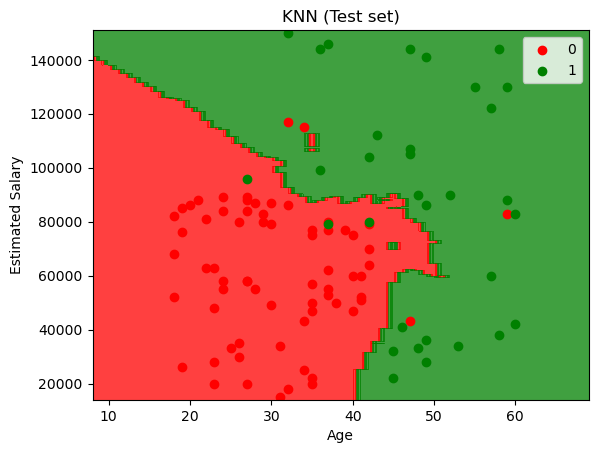

In [67]:
from matplotlib.colors import ListedColormap
X_set, y_set = scaler.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Cross Validation and Pipeline

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor

pipe = Pipeline(
    steps=[
        ("scaler", StandardScaler()), 
        ("knn", KNeighborsClassifier())
    ]
)

# CV on train set
cv_scores = cross_val_score(pipe, X_train, y_train, cv=10, scoring='accuracy')
mean_accuracy = np.mean(cv_scores)
std_accuracy = np.std(cv_scores)
print(f"Mean Accuracy: {(mean_accuracy*100):.2f}%")

# Tune the params & CV
param_grid = {
    'knn__n_neighbors': range(1, 21),
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(pipe, param_grid, cv=10, scoring='accuracy')
best_model = grid_search.fit(X_train, y_train)

# best params
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {(grid_search.best_score_*100):.2f}%")

# using the best model
y_pred = grid_search.best_estimator_.predict(X_test)
print(f'Accuracy on test set: {accuracy_score(y_test, y_pred)*100}%')


Mean Accuracy: 90.67%
Best Parameters: {'knn__metric': 'euclidean', 'knn__n_neighbors': 11, 'knn__weights': 'uniform'}
Best Cross-Validation Accuracy: 91.00%
Accuracy on test set: 93.0%
